<p style="text-align: center; font-size: 35px">TIỂU LUẬN / ĐỒ ÁN</p> <br>
<p style="text-align: center; font-size: 35px">PHÂN TÍCH CÁC YẾU TỐ ẢNH HƯỞNG ĐẾN KẾT QUẢ HỌC TẬP</p> 

## Bảng mục lục 
- 1. [Mục Tiêu](#muc-tieu)
- 2. [Giới thiệu về tập dữ liệu](#introduction)
- 3. [Thực hiện các công việc](#assignments) <br>
  - 3.1. [Công việc 1: Khám phá và xử lý dữ liệu](#task-1) <br>
    - 3.1.1. [Tải và đọc dữ liệu bằng pandas](#task-1-1) <br>
    - 3.1.2. [Phân tích cơ bản: kiểm tra giá trị thiếu và xử lý (ví dụ: thay bằng trung bình hoặc loại bỏ).](#task-1-2) <br>
    - 3.1.3. [Báo cáo ngắn về đặc điểm dữ liệu: số bản ghi, phân phối G3, studytime, v.v](#task-1-3) <br>
  - 3.2. [Công việc 2: Trực quan hóa dữ liệu](#task-2) <br>
    - 3.2.1. [Biểu đồ từ thư viện Matplotlib](#task-2-1) <br>
    - 3.2.2. [Biểu đồ từ thư viện Seaborn](#task-2-2) <br>
    - 3.2.3. [Biểu đồ từ thư viện Bokeh](#task-2-3) <br>
  - 3.3. [Công việc 3: Kiểm định thống kê với giả thuyết](#task-3) <br>
    - 3.3.1. [Kiểm định t-test](#task-3-1) <br>  
    - 3.3.2. [Kiểm định z-test](#task-3-2) <br>
    - 3.3.2. [Kiểm định Chi-square test](#task-3-3) <br>
  - 3.4. [Công việc 4: Phân tích và báo cáo](#task-4) <br>
    - 3.4.1. [Giới thiệu tập dữ liệu, lý do chọn file, mục tiêu phân tích.](#task-4-1) <br>
    - 3.4.2. [Mô tả cách tạo các biểu đồ, lý do chọn, xử lý dữ liệu (nếu có).](#task-4-2) <br>
    - 3.4.3. [Phân tích xu hướng từ biểu đồ và kết quả kiểm định.](#task-4-3) <br>
    - 3.4.4. [Đề xuất ít nhất 2 cách cải thiện kết quả học tập, dựa trên dữ liệu và kiểm định.](#task-4-4) <br>


## <span id="muc-tieu"></span>
# 1. Mục Tiêu

Sử dụng Python (Matplotlib, Seaborn, Bokeh, pandas, scipy.stats) để phân tích tập dữ liệu về kết quả học tập, nhằm:

- Khám phá các yếu tố ảnh hưởng đến điểm số, như thời gian học, ngày nghỉ, giới tính.
- Áp dụng kiểm định thống kê (t-test, z-test, chi-square) với các giả thuyết (được xác định trong Công việc 3) để phân tích các xu hướng.
- Đề xuất cách cải thiện hiệu suất học tập dựa trên dữ liệu.

## <span id="introduction"></span>
# 2. Giới thiệu về tập dữ liệu



- Nguồn: <a herf='https://archive.ics.uci.edu/dataset/320/student+performance'>UCI Machine Learning Repository.</a>
- File: student-mat.csv (môn Toán).
- Nội dung: ~395 bản ghi, với:
  - G1, G2, G3: Điểm kỳ 1, kỳ 2, kỳ cuối (0-20).
  - studytime: Thời gian học/tuần (1: <2 giờ, 2: 2-5 giờ, 3: 5-10 giờ, 4: >10 giờ).
  - absences: Số ngày nghỉ (0-93).
  - sex: Giới tính (M/F).
  - age, freetime: Tuổi, thời gian rảnh (1-5).


## <span id="assignments"></span>
# 3. Thực hiện các công việc

### Bắt đầu với Spark session

In [4]:
# Cấu hình pandas
import pandas as pd


import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Studying_Result').getOrCreate()

## <span id="task-1"></span>
### 3.1. Công việc 1: Khám phá và xử lý dữ liệu

## <span id="task-1-1"></span>
### 3.1.1. Tải và đọc dữ liệu bằng pandas

In [5]:
df = spark.read.csv("D:\\School\\Nam_3_Hoc_KY_2\\PTDL\\DoAnCuoiKy\\student+performance\\student\\student-mat.csv",header=True, inferSchema=True,sep=";")
df.limit(10).toPandas()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


## <span id="task-1-2"></span>
### 3.1.2. Phân tích cơ bản: kiểm tra giá trị thiếu và xử lý (ví dụ: thay bằng trung bình hoặc loại bỏ).

#### Kiểm tra giá trị bị thiếu

In [3]:
df_pandas = df.toPandas()
count = df_pandas.isnull().sum().sum()
print(f"Tổng số dữ liệu thiếu: {count}")

Tổng số dữ liệu thiếu: 0


## <span id="task-1-3"></span>
### 3.1.3. Báo cáo ngắn về đặc điểm dữ liệu: số bản ghi, phân phối G3, studytime, v.v

##### Thông tin tổng quan:

In [4]:
print("Số lượng bản ghi trong tập dữ liệu:", df.count())

Số lượng bản ghi trong tập dữ liệu: 395


In [6]:
df_pandas = df.toPandas()
df.describe()
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int32 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int32 
 7   Fedu        395 non-null    int32 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int32 
 13  studytime   395 non-null    int32 
 14  failures    395 non-null    int32 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

##### Phân phối điểm G3 (Điểm cuối kỳ)

1. Thông tin cơ bản
  - Tổng số học sinh: 395
  - Giá trị điểm G3 duy nhất

In [9]:
df_pandas = df.toPandas()
sorted(df_pandas['G3'].unique())

[np.int32(0),
 np.int32(4),
 np.int32(5),
 np.int32(6),
 np.int32(7),
 np.int32(8),
 np.int32(9),
 np.int32(10),
 np.int32(11),
 np.int32(12),
 np.int32(13),
 np.int32(14),
 np.int32(15),
 np.int32(16),
 np.int32(17),
 np.int32(18),
 np.int32(19),
 np.int32(20)]

2. Trực quan sự phân phối G3

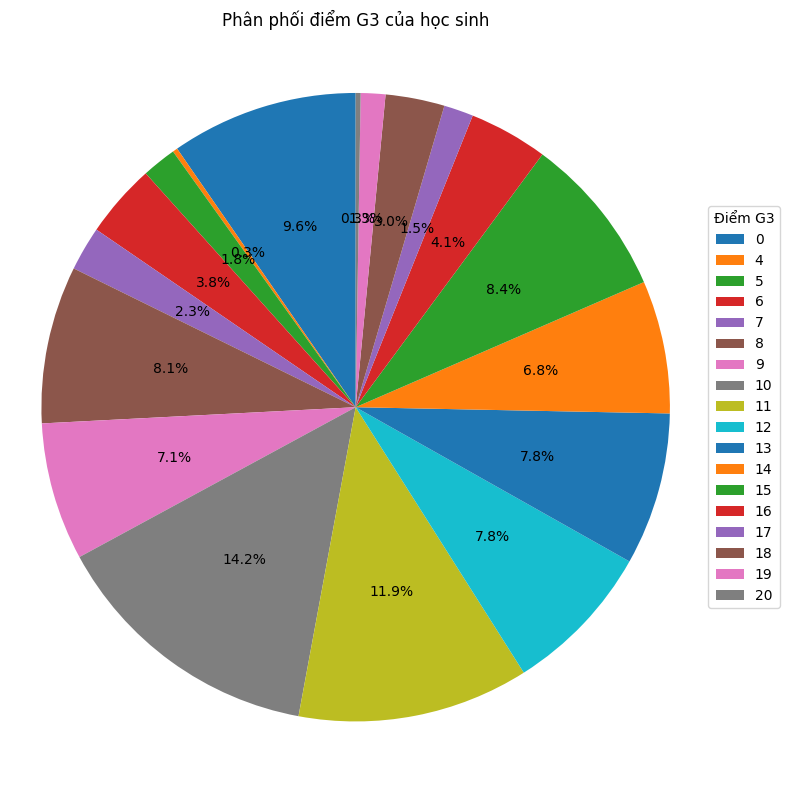

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
df_pandas = df.toPandas()
g3_counts = df_pandas['G3'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    g3_counts,
    labels=None,  
    autopct='%1.1f%%',
    startangle=90
)

plt.legend(wedges, g3_counts.index, title="Điểm G3", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Phân phối điểm G3 của học sinh')
plt.axis('equal')  
plt.tight_layout()
plt.show()

Phân phối điểm G3 (số lượng theo từng điểm)

In [ ]:
df_pandas = df.toPandas()
df_pandas['G3'].value_counts().sort_index()

G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: count, dtype: int64

3. Thống kê mô tả

In [ ]:
df_pandas = df.toPandas()
df_pandas['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

4. Kết luận mô tả

- Giá trị thấp nhất: 0

- Giá trị cao nhất: 20

- Trung bình (mean): khoảng 10.4

- Trung vị (median): 11

- Độ lệch chuẩn: khoảng 4.6

- Số học sinh đạt điểm 0: Có ~37 học sinh (~9.4%) bị điểm liệt hoặc rớt môn.

- Xu hướng phân phối:
  - Số lượng học sinh có điểm G3 từ 10 đến 15 là nhiều nhất.

##### Phân phối thời gian học

In [19]:
studytime_distribution = df_pandas['studytime'].value_counts().sort_index()
print("Phân phối thời gian học (studytime):")
for studytime, count in studytime_distribution.items():
    print(f"  Studytime = {studytime}: {count} học sinh")

Phân phối thời gian học (studytime):
  Studytime = 1: 105 học sinh
  Studytime = 2: 198 học sinh
  Studytime = 3: 65 học sinh
  Studytime = 4: 27 học sinh


## <span id="task-2"></span>
### 3.2. Công việc 2: Trực quan hóa dữ liệu

## <span id="task-2-1"></span>
#### 3.2.1. Biểu đồ từ thư viện Matplotlib

- Cấu hình thư viện matplot

In [7]:
# Cấu hình matplotlib
import matplotlib.pyplot as plt

- Biểu đồ cột: Số lượng học sinh theo thời gian học (studytime)

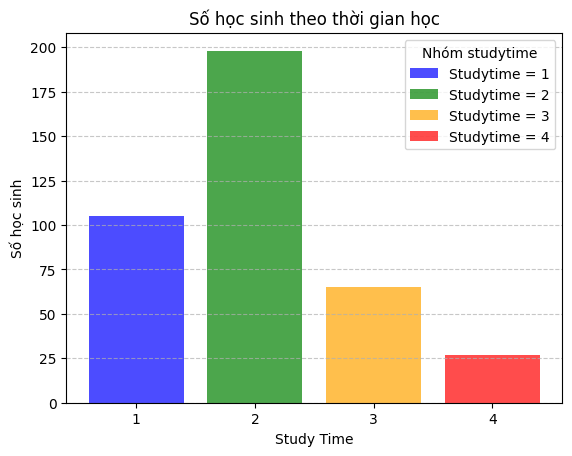

In [7]:
df_pandas = df.toPandas()
studytime_counts = df_pandas.groupby('studytime').size()

studytime_index = studytime_counts.index
studytime_values = studytime_counts.values

colors = ['blue', 'green', 'orange', 'red']  


bars = plt.bar(studytime_index, studytime_values, color=colors, alpha=0.7)


plt.xlabel('Study Time')
plt.ylabel('Số học sinh')
plt.title('Số học sinh theo thời gian học')


plt.xticks(studytime_index)


plt.grid(axis='y', linestyle='--', alpha=0.7)


legend_labels = [f'Studytime = {time}' for time in studytime_index]
plt.legend(bars, legend_labels, title="Nhóm studytime")


plt.show()




- Kết luận cho biểu đồ cột trên
  - Phân bố số lượng học sinh theo studytime:
    - Studytime = 2 có số học sinh nhiều nhất, cho thấy đây là mức thời gian học phổ biến nhất trong mẫu khảo sát.
    - Studytime = 1 cũng có số lượng tương đối lớn.
    - Studytime = 3 và đặc biệt là studytime = 4 có số lượng học sinh ít hơn rõ rệt.
  - Nhận định từ biểu đồ:
    - Phần lớn học sinh chỉ dành thời gian học ở mức trung bình (1 hoặc 2).
    - Rất ít học sinh dành nhiều thời gian để học (mức 4) — có thể do các yếu tố như lịch học chính khóa, học thêm, thói quen học tập, hoặc động lực cá nhân.
    - Điều này có thể ảnh hưởng đến kết quả học tập, và cần được kiểm định xem studytime cao có liên quan đến điểm G3 cao hay không.

- Biểu đồ phân tán: studytime và G3, với màu sắc khác nhau cho nam (sex='M') và nữ (sex='F')

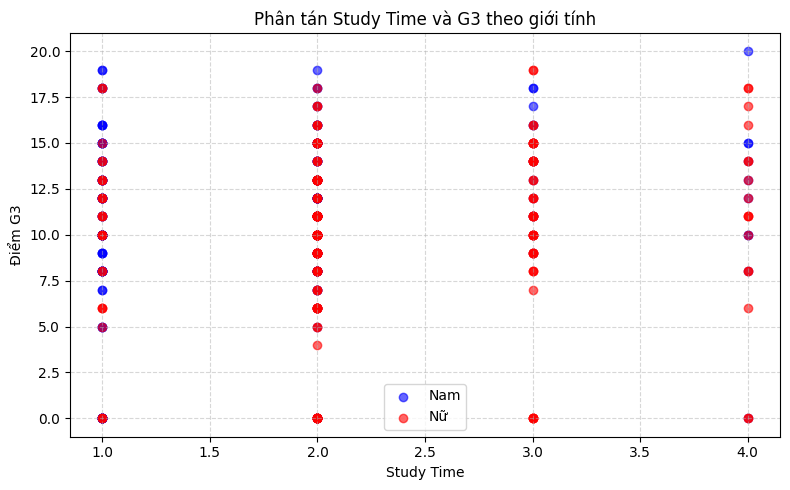

In [23]:
df_pandas = df.toPandas()
df_male = df_pandas[df_pandas['sex'] == 'M']
df_female = df_pandas[df_pandas['sex'] == 'F']
plt.figure(figsize=(8, 5))
plt.scatter(df_male['studytime'], df_male['G3'], color='blue', alpha=0.6, label='Nam')
plt.scatter(df_female['studytime'], df_female['G3'], color='red', alpha=0.6, label='Nữ')

plt.xlabel("Study Time")
plt.ylabel("Điểm G3")
plt.title("Phân tán Study Time và G3 theo giới tính")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- Kết luận cho biểu đồ phân tán trên
  - Mối quan hệ giữa studytime và G3:
    - Có xu hướng tích cực nhẹ: Những học sinh có thời gian học (studytime) cao hơn có xu hướng đạt điểm G3 cao hơn.
    - Tuy nhiên, dữ liệu vẫn phân tán rộng và chưa có một tương quan mạnh rõ rệt.
  - So sánh theo giới tính:
    - Nam và nữ đều phân bố điểm G3 ở mọi mức studytime, nhưng:
      - Nữ (điểm đỏ) có vẻ tập trung nhiều hơn ở mức studytime 2-3 và thường có G3 cao hơn trung bình.
      - Nam (điểm xanh) phân tán nhiều hơn, xuất hiện cả ở các điểm G3 thấp và studytime thấp.

## <span id="task-2-2"></span>
#### 3.2.2. Biểu đồ từ thư viện Seaborn

- Cấu hình thư viện Seaborn

In [10]:
#Cấu hình seaborn
import seaborn as sns

- Biểu đồ lmplot: studytime và G3, với hue='sex'.

<Figure size 800x600 with 0 Axes>

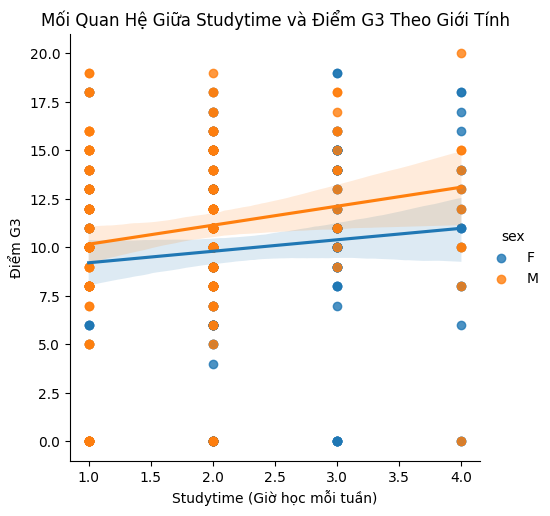

In [11]:
df_pandas = df.toPandas()
plt.figure(figsize=(8, 6))
sns.lmplot(x='studytime', y='G3', data=df_pandas, hue='sex', logistic=False)
plt.title('Mối Quan Hệ Giữa Studytime và Điểm G3 Theo Giới Tính')
plt.xlabel('Studytime (Giờ học mỗi tuần)')
plt.ylabel('Điểm G3')
plt.show()


- Kết luận cho biểu đồ hồi quy tuyến tính trên
  - Mối quan hệ giữa Studytime và G3:
    - Studytime (thời gian học) có mối quan hệ tích cực với G3 (điểm thi). Điều này có nghĩa là khi studytime tăng (học nhiều hơn), G3 (điểm thi) cũng có xu hướng tăng.
    - Đường hồi quy thể hiện sự thay đổi của G3 khi studytime thay đổi, cho thấy mối liên hệ tuyến tính giữa hai yếu tố này.
  - Sự phân biệt theo giới tính:
    - Giới tính nam và nữ có các đường hồi quy riêng biệt, với nam (được phân biệt bằng màu cam) và nữ (được phân biệt bằng màu xanh dương).
    - Đường hồi quy cho nữ và nam có độ dốc tương đương, điều này có thể chỉ ra rằng studytime ảnh hưởng tương tự đến điểm thi của cả hai giới.


- Biểu đồ boxplot: Phân phối G3 theo studytime.

C:\Users\Admin\AppData\Local\Temp\ipykernel_29216\3064179466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=df_pandas, palette='coolwarm')


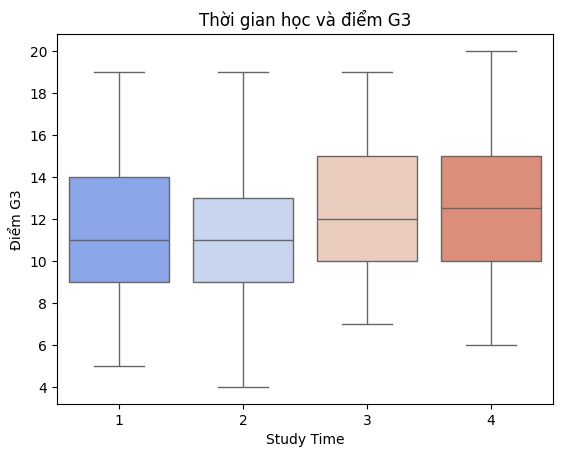

In [7]:
df_pandas = df.toPandas()
df_pandas = df_pandas[df_pandas['G3'] != 0]  # Loại bỏ G3 = 0 
sns.boxplot(x='studytime', y='G3', data=df_pandas, palette='coolwarm')
plt.title('Thời gian học và điểm G3')
plt.xlabel('Study Time')
plt.ylabel('Điểm G3')
plt.show()

- Kết luận chi tiết cho biểu đồ hộp trên sau khi loại bỏ ngoại lệ:
  - Phân bố điểm G3 theo studytime:
    - Nhóm studytime thấp (studytime = 1): Mặc dù vẫn có sự phân bố rộng, nhưng việc loại bỏ các ngoại lệ giúp cho biểu đồ trở nên gọn gàng hơn, chỉ còn lại các điểm trong phạm vi hợp lý. Điểm trung vị của nhóm này có thể vẫn thấp hơn so với các nhóm học nhiều hơn.
    - Nhóm studytime cao (studytime = 4): Sau khi loại bỏ ngoại lệ, hộp (box) có thể trở nên chặt chẽ hơn, thể hiện rằng học sinh học nhiều có xu hướng đạt điểm cao hơn và ít biến động trong kết quả.
    - Nhóm studytime trung bình (studytime = 2 và studytime = 3): Các nhóm này vẫn có sự phân bố khá đều, nhưng với việc loại bỏ ngoại lệ, chúng ta sẽ thấy rằng điểm G3 có sự phân tán ít hơn so với các nhóm học ít.
  - Mối quan hệ giữa studytime và G3:
    - Việc loại bỏ ngoại lệ giúp bạn quan sát rõ hơn mối quan hệ giữa studytime và G3. Studytime càng cao, thì điểm G3 càng có xu hướng tăng. Cụ thể:
      - Nhóm học ít (studytime = 1) vẫn có sự phân tán điểm khá rộng, nhưng các điểm cực kỳ thấp hoặc bất thường đã được loại bỏ.
      - Nhóm học nhiều (studytime = 4) thể hiện mức độ tập trung cao hơn và ít biến động trong kết quả học tập.
  - Tính nhất quán của các nhóm:
    - Sau khi loại bỏ các điểm ngoại lệ, bạn có thể thấy sự ổn định hơn trong kết quả học tập, đặc biệt ở các nhóm học sinh dành nhiều thời gian học (studytime = 4). Điều này có thể chỉ ra rằng học sinh học nhiều có xu hướng đạt điểm cao và kết quả học tập của họ ít bị ảnh hưởng bởi các yếu tố ngoại lệ.
- Kết luận tổng thể:
  - Studytime có mối quan hệ tích cực với G3: Học sinh dành nhiều thời gian học có xu hướng đạt điểm thi cao hơn và sự phân tán điểm thi thấp hơn.
  - Việc loại bỏ các điểm ngoại lệ đã giúp biểu đồ trở nên rõ ràng hơn, loại bỏ ảnh hưởng của các điểm dữ liệu không hợp lý.
  - Sự khác biệt giữa các nhóm studytime: Học sinh học ít có sự phân tán điểm lớn, trong khi học sinh học nhiều có sự ổn định cao hơn về kết quả học tập.

- Biểu đồ pairplot: Mối quan hệ giữa G1, G2, G3, studytime.

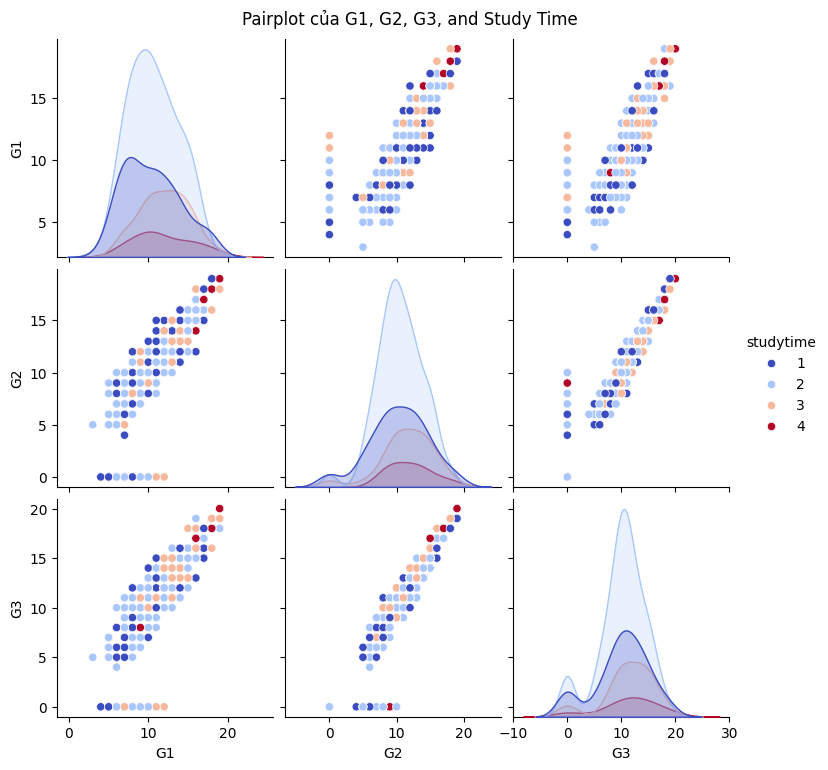

In [13]:
df_pandas = df.toPandas()
sns.pairplot(df_pandas[['G1', 'G2', 'G3', 'studytime']], hue='studytime', palette='coolwarm')
plt.suptitle('Pairplot của G1, G2, G3, and Study Time', y=1.02)
plt.show()

- Kết luận cho biểu đồ pairplot trên:
  - Biểu đồ pairplot giúp ta trực quan hóa mối quan hệ giữa các cặp đặc trưng trong dữ liệu. Trong trường hợp này, ta đang xem xét mối quan hệ giữa G1 (Điểm kiểm tra đầu vào), G2 (Điểm giữa kỳ), G3 (Điểm cuối kỳ), và Study Time (Thời gian học). Pairplot sẽ cho phép bạn nhìn thấy các biểu đồ phân tán giữa tất cả các cặp đặc trưng, cũng như phân phối của từng đặc trưng trên đường chéo.
  - Studytime có mối quan hệ rõ ràng với G3: Học sinh dành nhiều thời gian học có xu hướng có điểm G3 cao hơn.
  - Mối quan hệ giữa các điểm số (G1, G2, G3): Có một mối quan hệ mạnh mẽ giữa G1, G2, và G3. G2 có ảnh hưởng trực tiếp và mạnh mẽ đến G3, trong khi G1 ảnh hưởng gián tiếp hơn.
  - Sự phân bố của các đặc trưng: G1 và G2 có sự phân phối đồng đều hơn, trong khi studytime có thể có sự phân bố không đồng đều, phản ánh sự khác biệt lớn trong mức độ học tập của học sinh.

## <span id="task-2-3"></span>
#### 3.2.3. Biểu đồ từ thư viện Bokeh

- Cấu hình thư viện Bokeh

In [43]:
# Cấu hình Bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CustomJS, Slider, LabelSet, Legend, LegendItem
from bokeh.palettes import Bright3
from bokeh.layouts import column, row


- Biểu đồ phân tán tương tác: studytime và G3, với HoverTool hiển thị age, sex, absences.

In [71]:
output_notebook()
df_pandas = df.toPandas()
df_pandas['color'] = df_pandas['studytime'].map({1: 'blue', 2: 'green', 3: 'orange', 4: 'red'})
sources = ColumnDataSource(df_pandas)
fig = figure(title="Điểm G3 theo thời gian học", x_axis_label='Study Time', y_axis_label='Điểm G3', width=500, height=600)
for studytime, color in zip([1, 2, 3, 4], ['blue', 'green', 'orange', 'red']):
    group_data = df_pandas[df_pandas['studytime'] == studytime]
    group_source = ColumnDataSource(group_data)
    fig.circle(x='studytime', y='G3', source=group_source, size=10, color=color, alpha=0.5, legend_label=f"Studytime = {studytime}")
fig.add_tools(HoverTool(tooltips=[("Tuổi", "@age"), ("Giới tính", "@sex"), ("Lần nghỉ học", "@absences")]))
fig.legend.title = "Nhóm Studytime"
fig.legend.location = "top_left"
fig.legend.label_text_font_size = '10pt'
fig.legend.click_policy = "hide"
show(fig)


Loading BokehJS ...

- Kết luận cho biểu đồ phân tán tương tác trên
  - Studytime có mối quan hệ tích cực với G3: Học sinh dành nhiều thời gian học có xu hướng đạt điểm cao hơn trong G3. Điều này phản ánh mối quan hệ hợp lý giữa thời gian học và kết quả học tập.
  - Các nhóm studytime có sự phân biệt rõ ràng: Mỗi nhóm studytime được phân biệt rõ ràng thông qua màu sắc, giúp bạn dễ dàng quan sát sự thay đổi điểm G3 giữa các mức studytime khác nhau.
  - Các tính năng tương tác như HoverTool và legend giúp người dùng có thể tìm hiểu chi tiết và tương tác với biểu đồ để rút ra những kết luận sâu sắc hơn.

- Row layout: (1) Biểu đồ cột cho studytime, (2) Biểu đồ phân tán như trên.

In [72]:
output_notebook()

df_pandas = df.toPandas()


df_pandas['color'] = df_pandas['studytime'].map({1: 'blue', 2: 'green', 3: 'orange', 4: 'red'})
sources = ColumnDataSource(df_pandas)
fig = figure(title="Điểm G3 theo thời gian học", x_axis_label='Study Time', y_axis_label='Điểm G3', width=500, height=600)
for studytime, color in zip([1, 2, 3, 4], ['blue', 'green', 'orange', 'red']):
    group_data = df_pandas[df_pandas['studytime'] == studytime]
    group_source = ColumnDataSource(group_data)
    fig.circle(x='studytime', y='G3', source=group_source, size=10, color=color, alpha=0.5, legend_label=f"Studytime = {studytime}")
fig.add_tools(HoverTool(tooltips=[("Tuổi", "@age"), ("Giới tính", "@sex"), ("Lần nghỉ học", "@absences")]))
fig.legend.title = "Nhóm Studytime"
fig.legend.location = "top_left"
fig.legend.label_text_font_size = '10pt'
fig.legend.click_policy = "hide"




studytime_counts = df_pandas['studytime'].value_counts().sort_index()

expected_studytime = [1, 2, 3, 4]
studytime_counts = studytime_counts.reindex(expected_studytime, fill_value=0)
source = ColumnDataSource(data=dict(
    studytime=[str(x) for x in studytime_counts.index],
    counts=studytime_counts.values,
    colors=['blue', 'green', 'orange', 'red']
))


bar_plot = figure(
    title="Số Học Sinh Theo Studytime",
    x_axis_label='Studytime (Giờ học mỗi tuần)',
    y_axis_label='Số Học Sinh',
    tools="pan,box_zoom,reset",
    width=500,
    height=600,
    x_range=[str(x) for x in expected_studytime]
)

# Vẽ các cột với màu sắc cho từng nhóm studytime
for i, studytime in enumerate(studytime_counts.index):
    temp_source = ColumnDataSource(data=dict(
        x=[str(studytime)],
        top=[studytime_counts[studytime]],
        colors=[source.data['colors'][i]]
    ))
    bar_plot.vbar(
        x='x',
        top='top',
        width=0.2,
        fill_color='colors',
        source=temp_source,
        legend_label=f"Studytime = {studytime}",
        muted_alpha=0.2
    )

# Thêm nhãn hiển thị tổng số trên mỗi cột
labels = LabelSet(
    x='studytime',
    y='counts',
    text='counts',
    level='glyph',
    x_offset=0,
    y_offset=5,  
    source=source,
    text_align='center',
    text_font_size='10pt'
)
bar_plot.add_layout(labels)

bar_plot.legend.title = "Nhóm studytime"
bar_plot.legend.location = "top_left"
bar_plot.legend.click_policy = "mute"

bar_plot.xgrid.grid_line_color = None
bar_plot.y_range.start = 0
layout = row(bar_plot, fig)
show(layout)

Loading BokehJS ...

- Kết luận về hai biểu đồ trên:
  - Mối quan hệ giữa Studytime và G3: Cả hai biểu đồ đều thể hiện rằng studytime có mối quan hệ tích cực với G3. Học sinh học nhiều hơn (studytime cao) có xu hướng đạt điểm cao hơn trong kỳ thi cuối kỳ (G3).

  - Sự phân bố số học sinh theo Studytime: Biểu đồ cột cho thấy rằng studytime = 2 có số học sinh đông nhất, trong khi studytime = 3 và studytime = 4 có ít học sinh hơn. Điều này cho thấy rằng phần lớn học sinh dành khoảng thời gian học 2 giờ mỗi tuần.

  - Các tính năng tương tác:

    - HoverTool trong biểu đồ phân tán cho phép bạn xem thông tin chi tiết về từng học sinh, bao gồm tuổi, giới tính, và số lần nghỉ học.

    - Legend trong biểu đồ cột giúp bạn dễ dàng ẩn/hiện các nhóm studytime khác nhau và so sánh số lượng học sinh giữa các nhóm.

  - Sự ổn định của mối quan hệ: Biểu đồ phân tán cho thấy studytime và G3 có mối quan hệ ổn định. Cùng với đó, số học sinh trong các nhóm studytime khác nhau có sự phân bố rõ ràng, cho phép bạn dễ dàng phân tích nhóm học sinh nào có studytime nhiều nhất và nhóm nào có studytime ít nhất.

- Tính năng ẩn/hiện cho nam và nữ trong biểu đồ phân tán.

In [24]:
output_notebook()

df_pandas = df.toPandas()

colors = {"M": 'red', "F": 'blue'}
fig = figure(title="Điểm G3 theo thời gian học", x_axis_label='Study Time', y_axis_label='Điểm G3', width=800, height=400)
for sex_value, color in colors.items():
    subset = df_pandas[df_pandas["sex"] == sex_value]
    source = ColumnDataSource(subset)
    fig.circle(x='studytime', y='G3', source=source, size=10, color=color,
                alpha=0.3,  legend_label=f"Giới tính: {sex_value}")

fig.add_tools(HoverTool(tooltips=[("Tuổi", "@age"), ("Giới tính", "@sex"), ("Lần nghỉ học", "@absences")]))
fig.legend.click_policy = "hide"
fig.legend.title = "Giới tính"
show(fig)

Loading BokehJS ...

- Thêm slider widget trong Bokeh để lọc studytime và cập nhật biểu đồ.

In [77]:
output_notebook()

df_pandas = df.toPandas()

sources = []
original_sources = []
colors = {"M": 'red', "F": 'blue'}

fig = figure(title="Điểm G3 theo thời gian học", x_axis_label='Study Time', y_axis_label='Điểm G3', width=800, height=400)
for sex_value, color in colors.items():
    subset = df_pandas[df_pandas["sex"] == sex_value]
    original_source = ColumnDataSource(subset)
    source = ColumnDataSource(subset)

    original_sources.append(original_source)
    sources.append(source)

    fig.circle(x='studytime', y='G3', source=source, size=10, color=color,
                alpha=0.3,  legend_label=f"Giới tính: {sex_value}")
    

callback = CustomJS(args=dict(sources=sources, original_sources=original_sources), code="""
    var threshold = cb_obj.value;

    
    for (var i = 0; i < sources.length; i++) {
        var source = sources[i];
        var original_data = original_sources[i].data;
        var new_data = {studytime: [], G3: [], age: [], sex: [], absences: []};

        for (var j = 0; j < original_data['studytime'].length; j++) {
            if (original_data['studytime'][j] >= threshold) {
                new_data['studytime'].push(original_data['studytime'][j]);  
                new_data['G3'].push(original_data['G3'][j]); 
                new_data['age'].push(original_data['age'][j]);
                new_data['sex'].push(original_data['sex'][j]);
                new_data['absences'].push(original_data['absences'][j]);
            }
        }

        // Cập nhật dữ liệu
        source.data = new_data;
        source.change.emit();
    }
""")


slider = Slider(start=0, end=4, value=0, step=0.01, title="Ngưỡng Study Time")
slider.js_on_change("value", callback) 


fig.add_tools(HoverTool(tooltips=[("Tuổi", "@age"), ("Giới tính", "@sex"), ("Lần nghỉ học", "@absences")]))
fig.legend.click_policy = "hide"
fig.legend.title = "Giới tính"
show(column(fig, slider))

Loading BokehJS ...

## <span id="task-3"></span>
### 3.3. Công việc 3: Kiểm định thống kê với giả thuyết

- Cấu hình kiểm định thống kê với giải thuyết

In [ ]:
from scipy.stats import norm, ttest_ind
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency
import numpy as np

## <span id="task-3-1"></span>
#### 3.3.1. Kiểm định t-test

Ta có:
- Giả thuyết H0: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).



- Giả thuyết H1: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn không đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).

- Giả định trung bình điểm G3 của học sinh có ngày nghỉ thấp:

In [10]:
df_pandas = df.toPandas()
mean_absences = df_pandas['absences'].mean()
low_absence = df_pandas[df_pandas['absences'] <= mean_absences]['G3']
print(f"Giá trị trung bình điểm G3 của học sinh có ngày nghỉ thấp: {low_absence.mean():.2f}")

Giá trị trung bình điểm G3 của học sinh có ngày nghỉ thấp: 10.17


- Giả định trung bình điểm G3 của học sinh có ngày nghỉ cao 

In [11]:
df_pandas = df.toPandas()
mean_absences = df_pandas['absences'].mean()
high_absence = df_pandas[df_pandas['absences'] > mean_absences]['G3']
print(f"Giá trị trung bình điểm G3 của học sinh có ngày nghỉ cao: {high_absence.mean():.2f}")

Giá trị trung bình điểm G3 của học sinh có ngày nghỉ cao: 10.84


=> Bằng mắt thường, ta đã thấy giá trị trung bình điểm G3 của nhóm học sinh nghỉ nhiều thấp hơn không đáng kể so với giá trị điểm trung bình G3 của nhóm học sinh nghỉ ít. 

Kiểm định giả thuyết H0 và H1

- Độ lệch chuẩn của trung bình điểm G3 học sinh có ngày nghỉ thấp đã có:

In [12]:
dolechchuanthap = low_absence.std(ddof=1)
print(f"Độ lệch chuẩn của nhóm G3 học ít: {dolechchuanthap:.2f}")

Độ lệch chuẩn của nhóm G3 học ít: 5.19


- Độ lệch chuẩn của trung bình điểm G3 học sinh có ngày nghỉ cao đã có:

In [13]:
dolechchuancao = high_absence.std(ddof=1)
print(f"Độ lệch chuẩn của nhóm G3 học ít: {dolechchuancao:.2f}")

Độ lệch chuẩn của nhóm G3 học ít: 3.26


- Tính giá trị Z

In [14]:
z = (low_absence.mean() - high_absence.mean()) / np.sqrt((dolechchuanthap**2 / len(low_absence)) + (dolechchuancao**2 / len(high_absence)))
print(f"Giá trị Z: {z:.4f}")

Giá trị Z: -1.5676


- Tính p-value

In [15]:
p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"Giá trị P: {p_value:.4f}")

Giá trị P: 0.1170


In [16]:
# Kết luận rằng
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ H1: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn không đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).")
    print("Chấp nhận H0: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).")
else:
    print("Chấp nhận H1: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn không đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).")
    print("Bác bỏ H0: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).")

Chấp nhận H1: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn không đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).
Bác bỏ H0: Học sinh có số ngày nghỉ cao (absences > trung bình) thì có trung bình điểm G3 thấp hơn đáng kể so với học sinh có số ngày nghỉ thấp (absences ≤ trung bình).


- Ý nghĩa thực tế: Việc chấp nhận H1 và bác bỏ H0 cho thấy rằng việc học sinh nghỉ nhiều không có ảnh hưởng đến điểm trung bình G3 của họ, tương tự đối với học sinh học nhiều hơn thì điểm trung bình G3 của họ chỉ cao hơn một chút. 

## <span id="task-3-2"></span>
#### 3.3.2. Kiểm định z-test

Ta có:
- Giả thuyết H0: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu).


- Giả thuyết H1: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì không có sự khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu).

- Trung bình giả định đã có:

In [17]:
df_pandas = df.toPandas()
population_mean = df_pandas['G3']
print(f"Giá trị trung bình giả định của toàn bộ: {population_mean.mean():.2f}")

Giá trị trung bình giả định của toàn bộ: 10.42


- Trung bình thực tế đã có:

In [18]:
df_pandas = df.toPandas()
low_studytime = df_pandas[df_pandas['studytime'] <= 2]['G3']
print(f"Giá trị trung bình thực tế của nhóm G3 học ít: {low_studytime.mean():.2f}")

Giá trị trung bình thực tế của nhóm G3 học ít: 10.13


=> Bằng mắt thường, ta đã thấy giá trị trung bình G3 của nhóm học ít (studytime <= 2) không khác đáng kể so với giá trị trung bình G3 của toàn bộ. 

Kiểm định giả thuyết H0 và H1

- Độ lệch chuẩn đã có:

In [19]:
dolechchuan = low_studytime.std(ddof=1)
print(f"Độ lệch chuẩn của nhóm G3 học ít: {dolechchuan:.2f}")

Độ lệch chuẩn của nhóm G3 học ít: 4.48


- Tính giá trị Z

In [20]:
z = (low_studytime.mean() - population_mean.mean()) / (dolechchuan / np.sqrt(len(low_studytime)))
print(f"Giá trị Z: {z:.4f}")

Giá trị Z: -1.1132


- Tính p-value

In [21]:
p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"Giá trị P: {p_value:.4f}")

Giá trị P: 0.2656


In [22]:
# Kết luận rằng
alpha = 0.05
if p_value < alpha:
    print("Bác bỏ H1: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì không khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu).")
    print("Chấp nhận H0: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu).")
else:
    print("Chấp nhận H1: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì không khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu). ")
    print("Bác bỏ H0: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu).")

Chấp nhận H1: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì không khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu). 
Bác bỏ H0: Trung bình điểm G3 của học sinh học ít (studytime ≤ 2) thì khác biệt đáng kể so với trung bình điểm kỳ vọng của toàn bộ học sinh (giả định từ trung bình toàn mẫu).


- Ý nghĩa thực tiễn:
  Việc chấp nhận H1 và bác bỏ H0 thể hiện rằng việc học sinh học ít không có ảnh hưởng quá nhiều đến điểm số G3

## <span id="task-3-3"></span>
#### 3.3.3. Kiểm định Chi-square test

Ta có:
- Giả thuyết H0: Có mối quan hệ giữa mức thời gian học (studytime) và việc đạt điểm cao (G3 ≥ 12) hay thấp (G3 < 12).

- Giả thuyết H1: Không có mối quan hệ giữa thời gian học (studytime) và việc đạt điểm cao hay thấp.

- Tạo biến nhị phân G3_binary

In [31]:
df_pandas = df.toPandas()

# Tạo biến nhị phân G3_binary
df_pandas['G3_binary'] = (df_pandas['G3'] >= 12).astype(int)

- Bảng tần số quan sát

In [33]:
# Bảng tần số quan sát
df_pandas = df.toPandas()
df_pandas['G3_binary'] = (df_pandas['G3'] >= 12).astype(int)
observed = pd.crosstab(df_pandas['studytime'], df_pandas['G3_binary'])
print("Bảng tần số quan sát:")
print(observed)


Bảng tần số quan sát:
G3_binary    0   1
studytime         
1           61  44
2          127  71
3           32  33
4           13  14


- Tổng hàng, tổng cột, tổng mẫu

In [34]:
# Tổng hàng, tổng cột, tổng mẫu
row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
total = observed.values.sum()

- Bảng tần số kỳ vọng

In [35]:
expected = pd.DataFrame(index=observed.index, columns=observed.columns, dtype=float)
for i in observed.index:
    for j in observed.columns:
        expected.loc[i, j] = row_totals[i] * col_totals[j] / total

print("\nBảng tần số kỳ vọng:")
print(expected)


Bảng tần số kỳ vọng:
G3_binary           0          1
studytime                       
1           61.936709  43.063291
2          116.794937  81.205063
3           38.341772  26.658228
4           15.926582  11.073418


- Giá trị chi-square

In [37]:
chi_square = 0
for i in observed.index:
    for j in observed.columns:
        O = observed.loc[i, j]
        E = expected.loc[i, j]
        chi_square += (O - E)**2 / E

print(f"\nGiá trị Chi-square: {chi_square:.4f}")


Giá trị Chi-square: 6.0775


- Giá trị của bậc tự do

In [38]:
# Bậc tự do
df_chi = (len(row_totals) - 1) * (len(col_totals) - 1)
print(f"Bậc tự do: {df_chi}")

Bậc tự do: 3


- Tính giá trị p dựa trên phân phối chi-square

In [39]:
p_value = 1 - chi2.cdf(chi_square, df_chi)
print(f"p-value: {p_value:.4f}")

p-value: 0.1079


- Kết luận giả thuyết

In [41]:
if p_value < 0.05:
    print("Bác bỏ H1: Không có mối quan hệ giữa thời gian học (studytime) và việc đạt điểm cao hay thấp.")
    print("Chấp nhận H0: Có mối quan hệ giữa mức thời gian học (studytime) và việc đạt điểm cao (G3 ≥ 12) hay thấp (G3 < 12).")
else:
    print("Chấp nhận H1: Không có mối quan hệ giữa thời gian học (studytime) và việc đạt điểm cao hay thấp.")
    print("Bác bỏ H0: Có mối quan hệ giữa mức thời gian học (studytime) và việc đạt điểm cao (G3 ≥ 12) hay thấp (G3 < 12).")

Chấp nhận H1: Không có mối quan hệ giữa thời gian học (studytime) và việc đạt điểm cao hay thấp.
Bác bỏ H0: Có mối quan hệ giữa mức thời gian học (studytime) và việc đạt điểm cao (G3 ≥ 12) hay thấp (G3 < 12).


- Ý nghĩa thực tiễn:
  Việc chấp nhận H1 và bác bỏ H0 thể hiện rằng việc học nhiều hay ít không có ảnh hưởng đến điểm cao hay thấp của học sinh.

## <span id="task-4"></span>
### 3.4. Công việc 4: Phân tích và báo cáo

## <span id="task-4-1"></span>
#### 3.4.1. Giới thiệu tập dữ liệu, lý do chọn file, mục tiêu phân tích.

- Giới thiệu chi tiết về tập dữ liệu <br>
Dữ liệu này là thành tích học tập của học sinh trong giáo dục trung học. Các thuộc tính dữ liệu bao gồm điểm số của học sinh, đặc điểm nhân khẩu học, xã hội và liên quan đến trường học và được thu thập bằng cách sử dụng báo cáo của trường và bảng câu hỏi. Hai tập dữ liệu được cung cấp liên quan đến thành tích trong hai môn học riêng biệt: Toán (mat) và tiếng Bồ Đào Nha (por).
  - Nguồn gốc: bản ghi thuộc quyền sở hữu của các tác giả là P. Cortez, A. M. G. Silva và được đăng tải trên UC Irvine Machine Learning Repository.
  - Số lượng bản ghi: 395 bản ghi.

- Lý do chọn file về môn Toán học <br>
Vì bản thân em muốn tìm hiểu xem các học sinh ở nước ngoài có yêu thích và đầu tư thời gian vào việc học toán hơn so với các môn ngoại ngữ. Thông qua phân tích các yếu tố như số ngày nghỉ, thời gian học, điểm số cuối kỳ (G3) và các yếu tố liên quan, em hy vọng có thể đánh giá được mức độ quan tâm và khả năng học tập môn Toán của học sinh.

- Mục tiêu phân tích
Mục tiêu của việc phân tích tập dữ liệu là tìm hiểu các yếu tố ảnh hưởng đến kết quả học tập môn Toán của học sinh, đặc biệt là điểm số cuối kỳ (G3). Cụ thể, em muốn phân tích mối quan hệ giữa thời gian học, số ngày nghỉ, các hoạt động ngoài giờ và kết quả học tập, xem chúng có ảnh hưởng hay liên kết sâu sắc với nhau như thế nào.

## <span id="task-4-2"></span>
#### 3.4.2. Mô tả cách tạo các biểu đồ, lý do chọn, xử lý dữ liệu.

#### - Biểu đồ 1: Biểu đồ cột từ thư viện Matlib - Số lượng học sinh theo thời gian học (studytime)

Để thể hiện số lượng học sinh theo các thời gian học, việc sử dụng biểu đồ cột từ Matplotlib là một cách tốt nhất để thấy rõ sự gom nhóm từ thuộc tính thời gian học (studytime).

  - Thư viện: matplotlib.pyplot
  - Hàm: plt.bar()
  - Tham số chính:
    - Trục ngang x: các mức thời gian học (1, 2, 3, 4)
    - Trục dọc y: số lượng học sinh
  - Lý do chọn biểu đồ: Biểu đồ cột trực quan cho thấy phân bố số lượng học sinh theo thời gian học, giúp dễ dàng nhận biết mức độ phổ biến của từng khoảng thời gian học trong tập dữ liệu.
  - Xử lý dữ liệu: Thực hiện phép gom nhóm theo thời gian học (studytime), tự động sẽ được lấy dữ liệu được phân theo nhóm để hiển thị số lượng học sinh của từng nhóm.

#### - Biểu đồ 2: Biểu đồ phân tán từ thư viện Matlib - studytime và G3, với màu sắc khác nhau cho nam (sex='M') và nữ (sex='F')

  - Thư viện: matplotlib.pyplot
  - Hàm: plt.scatter(), plt.figure(), plt.xlabel(), plt.ylabel(), plt.title(), plt.legend(), plt.grid(), plt.tight_layout(), plt.show()
  - Tham số chính:
    - Trục ngang x: studytime (Thời gian học mỗi tuần) - Mỗi điểm trên trục ngang đại diện cho số giờ học của học sinh mỗi tuần.
    - Trục dọc y: G3 (Điểm thi cuối kỳ) - Mỗi điểm trên trục dọc đại diện cho điểm thi cuối kỳ của học sinh.
  - Lý do chọn biểu đồ: 
    - Biểu đồ phân tán được sử dụng để thể hiện mối quan hệ giữa studytime và G3. Việc sử dụng biểu đồ phân tán giúp ta dễ dàng nhận thấy xu hướng của dữ liệu, chẳng hạn như việc học nhiều hơn có thể dẫn đến điểm cao hơn.
    - Biểu đồ phân tán cũng cho phép phân biệt các nhóm học sinh theo giới tính, giúp dễ dàng nhận diện sự khác biệt trong mối quan hệ giữa studytime và G3 giữa nam và nữ.
    - Màu sắc khác nhau cho nam và nữ giúp dễ dàng phân tích và so sánh các nhóm học sinh.
  - Xử lý dữ liệu: 
    - df_male = df_pandas[df_pandas['sex'] == 'M']: Tạo một DataFrame con chỉ chứa học sinh nam (giới tính 'M').
    - df_female = df_pandas[df_pandas['sex'] == 'F']: Tạo một DataFrame con chỉ chứa học sinh nữ (giới tính 'F').
    - Dữ liệu đã được chia thành hai nhóm riêng biệt theo giới tính để có thể hiển thị màu sắc khác nhau cho nam và nữ trong biểu đồ phân tán.

#### - Biểu đồ 3: Biểu đồ hồi quy tuyến tính từ thư viện Seaborn - studytime và G3, với hue='sex'

  - Thư viện: Seaborn
  - Hàm: sns.lmplot()
  - Tham số chính:
    - Trục ngang x: studytime (Thời gian học mỗi tuần) - Trục này đại diện cho số giờ học mà học sinh dành mỗi tuần.
    - Trục dọc y: G3 (Điểm thi cuối kỳ) - Trục này đại diện cho điểm thi cuối kỳ của học sinh.
  - Lý do chọn biểu đồ: 
    - Biểu đồ hồi quy tuyến tính giúp phân tích mối quan hệ giữa studytime và G3. Biểu đồ này thể hiện sự thay đổi của G3 (Điểm thi cuối kỳ) khi studytime thay đổi.
    - Sử dụng hue='sex' giúp phân biệt mối quan hệ giữa studytime và G3 giữa nam và nữ. Điều này giúp bạn thấy được liệu mối quan hệ giữa studytime và G3 có sự khác biệt giữa hai giới tính hay không.
    - Biểu đồ hồi quy tuyến tính phù hợp để kiểm tra các mối quan hệ tuyến tính
  - Xử lý dữ liệu:
    - df_pandas = df.toPandas(): Chuyển dữ liệu từ dạng PySpark sang Pandas DataFrame để dễ dàng thao tác với các thư viện như Seaborn.
    - sns.lmplot(x='studytime', y='G3', data=df_pandas, hue='sex', logistic=False): Sử dụng sns.lmplot để tạo biểu đồ hồi quy tuyến tính, trong đó:
      - x='studytime' và y='G3' xác định các biến hồi quy.
      - hue='sex' phân nhóm dữ liệu theo giới tính để vẽ các đường hồi quy khác nhau cho nam và nữ.
      - logistic=False: Chỉ định rằng không sử dụng hồi quy logistic mà dùng hồi quy tuyến tính (linear regression).


#### - Biểu đồ 4: Biểu đồ Boxplot từ thư viện Seaborn - Phân phối G3 theo thời gian học (studytime)

Để so sánh điểm G3 giữa các nhóm thời gian học với nhau, việc sử dụng biểu đồ hộp (Boxplot) từ thư viện Seaborn là hợp lý:
- Thư viện: Seaborn
- Hàm: sns.boxplot()
- Tham số chính:
  - Cột ngang x = 'studytime' : Nhóm phân loại thời gian học (studytime)
  - Cột dọc y = 'G3' : biến cần so sánh
  - data = df_pandas: nguồn dữ liệu
- Lý do chọn biểu đồ: Boxplot giúp thể hiện rõ sự phân bố, trung vị và các điểm ngoại lệ trong mức độ hài lòng giữa các nhóm. Biểu đồ này phù hợp để thấy rõ sự khác biệt tổng thể, điều mà biểu đồ cột không thể hiện được.
- Xử lý dữ liệu: Chỉ cần lọc các giá trị hợp lệ của studytime và G3 (nếu có thiếu dữ liệu thì loại bỏ).

#### - Biểu đồ 5: Biểu đồ PairPlot từ thư viện Seaborn - Mối quan hệ giữa G1, G2, G3, studytime.

  - Thư viện: Seaborn, Matplotlib
  - Hàm: sns.lmplot()
  - Tham số chính:
    - Trục ngang x: Các trục ngang trong PairPlot sẽ đại diện cho các biến: G1, G2, G3, và studytime. Các trục này cho thấy mối quan hệ giữa mỗi cặp biến.
    - Trục dọc y: Các trục dọc trong PairPlot cũng sẽ đại diện cho các biến G1, G2, G3, và studytime. Các trục này giúp xác định mối quan hệ giữa các biến trong từng cặp.
    - hue: studytime - Sử dụng studytime làm phân nhóm màu sắc để phân biệt các điểm dữ liệu giữa các mức studytime khác nhau (màu sắc khác nhau cho các mức thời gian học khác nhau).
  - Lý do chọn biểu đồ: 
    - PairPlot rất hữu ích để phân tích mối quan hệ giữa nhiều biến số cùng lúc, giúp bạn quan sát sự tương quan và phân phối của các cặp biến.
    - Với hue='studytime', bạn có thể dễ dàng phân biệt và phân tích mối quan hệ giữa các biến theo từng mức thời gian học, giúp đánh giá xem studytime có ảnh hưởng đến G1, G2, và G3 hay không.
    - Biểu đồ PairPlot giúp bạn dễ dàng nhận diện các mối quan hệ tuyến tính hoặc phi tuyến giữa các biến và phát hiện bất kỳ xu hướng hoặc nhóm nào trong dữ liệu.
  - Xử lý dữ liệu:
    - df_pandas = df.toPandas(): Dữ liệu được chuyển từ PySpark DataFrame sang Pandas DataFrame để sử dụng với thư viện Seaborn.
    - sns.pairplot(df_pandas[['G1', 'G2', 'G3', 'studytime']], hue='studytime', palette='coolwarm'): Sử dụng PairPlot để hiển thị mối quan hệ giữa các cặp biến G1, G2, G3, và studytime, với màu sắc phân nhóm theo studytime.
      - hue='studytime': Phân nhóm các điểm dữ liệu theo studytime.
      - palette='coolwarm': Chọn màu sắc gradient từ coolwarm để phân biệt các nhóm studytime.
    - plt.suptitle('Pairplot của G1, G2, G3, and Study Time', y=1.02): Thêm tiêu đề cho biểu đồ để giải thích nội dung
    - plt.show(): Hiển thị biểu đồ.


#### - Biểu đồ 6: Biểu đồ phân tán tương tác từ thư viện Bokeh - Tương tác giữa studytime và G3, có sử dụng các tiện ích như Hide Policy, HoverTool hiển thị age, sex, absences.

Để dễ dàng thấy được mối quan hệ giữa thuộc tính studytime và G3 tương tác với nhau, sử dụng biểu đồ phân tán từ Bokeh là sự lựa chọn tối ưu, người dùng có thể tương tác với dữ liệu như cho phép linh hoạt ẩn, hiện các dữ liệu theo nhóm, kết hợp các dữ liệu theo ngưỡng thời gian học tập (studytime) hoặc điểm G3. Ngoài ra, biểu đồ có chức năng ẩn / hiện dữ liệu theo thuộc tính sex (giới tính).

- Loại thư viện: bokeh.plotting
- Các hàm chính để tạo biểu đồ: figure(), circle(), HoverTool(), click_policy()
- Tham số chính:
  - Cột ngang x = 'studytime', cột dọc y = 'G3', và color = 'sex' để phân biệt các cá thể dựa vào giới tính nam và nữ.
  - Ngoài ra, trong biểu đồ còn sử dụng biến legend.click_policy = "hide" để tăng tương tác.
- Lý do chọn biểu đồ: Scatter Plot từ thư viện Bokeh cần thiết trong việc tương tác với biểu đồ, xem thông tin chi tiết của từng điểm bằng hàm HoverTool(), hiển thị từng điểm cụ thể mà không làm mất đi tính chi tiết của dữ liệu.
- Xử lý dữ liệu:
  - Chọn các cột cần thiết từ bộ dữ liệu: studytime, G3, age, sex, absences.
  - Xử lý giá trị thiếu (nếu có) bằng cách loại bỏ (dropna) để tránh lỗi khi vẽ biểu đồ.
  - Có thể chuyển đổi sex thành dạng văn bản ('Male'/'Female') nếu cần hiển thị đẹp hơn trên hover.

## <span id="task-4-3"></span>
#### 3.4.3. Phân tích xu hướng từ biểu đồ và kết quả kiểm định.

Phân tích từ các biểu đồ cho thấy các xu hướng ảnh hưởng lớn đến G3

<p style="text-align: center; font-size:35px">Biểu đồ cột từ thư viện Matplot</p> <br>

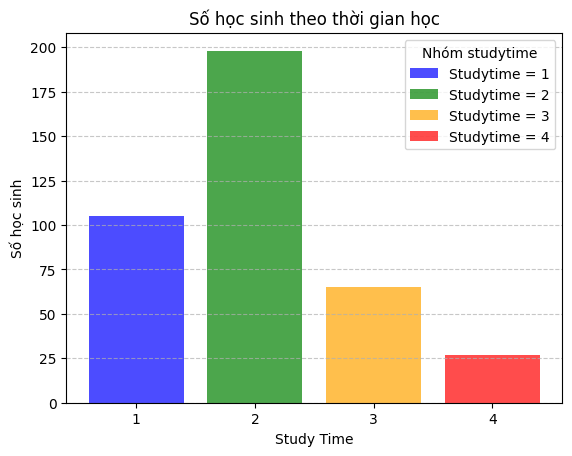

In [8]:
import matplotlib.pyplot as plt
df_pandas = df.toPandas()
studytime_counts = df_pandas.groupby('studytime').size()

studytime_index = studytime_counts.index
studytime_values = studytime_counts.values

colors = ['blue', 'green', 'orange', 'red']  


bars = plt.bar(studytime_index, studytime_values, color=colors, alpha=0.7)


plt.xlabel('Study Time')
plt.ylabel('Số học sinh')
plt.title('Số học sinh theo thời gian học')


plt.xticks(studytime_index)


plt.grid(axis='y', linestyle='--', alpha=0.7)


legend_labels = [f'Studytime = {time}' for time in studytime_index]
plt.legend(bars, legend_labels, title="Nhóm studytime")


plt.show()




Phân tích xu hướng

- Studytime = 2 có số lượng học sinh đông nhất, vượt trội so với các nhóm còn lại.
-> Điều này cho thấy đa số học sinh chỉ dành thời gian vừa phải cho việc học toán trên lớp, ngoài ra họ dành thời gian để tự học hoặc tham gia các hoạt động khác.
- Studytime = 3 cũng có số lượng học sinh khá cao, tuy nhiên ít hơn nhóm 2.
- Studytime = 1 và Studytime = 4 đều có số lượng học sinh thấp hơn nhiều.
Theo biểu đồ, ta thấy có rất ít học sinh dành thời gian cho việc học toán tại lớp.

<p style="text-align: center; font-size:35px">Biểu đồ phân tán từ thư viện Matplot</p> <br>

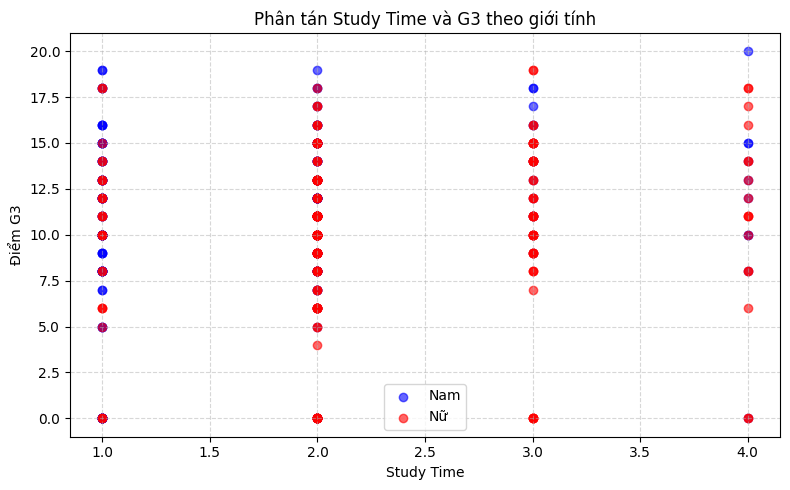

In [73]:
df_pandas = df.toPandas()
df_male = df_pandas[df_pandas['sex'] == 'M']
df_female = df_pandas[df_pandas['sex'] == 'F']
plt.figure(figsize=(8, 5))
plt.scatter(df_male['studytime'], df_male['G3'], color='blue', alpha=0.6, label='Nam')
plt.scatter(df_female['studytime'], df_female['G3'], color='red', alpha=0.6, label='Nữ')

plt.xlabel("Study Time")
plt.ylabel("Điểm G3")
plt.title("Phân tán Study Time và G3 theo giới tính")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Phân tích xu hướng

- Mối quan hệ giữa Studytime và G3:
  - Biểu đồ phân tán cho thấy mối quan hệ dương giữa studytime và G3, tức là khi studytime tăng (học nhiều hơn), G3 (Điểm thi cuối kỳ) cũng có xu hướng tăng. Điều này cho thấy học sinh dành nhiều thời gian học có xu hướng có điểm cao hơn trong kỳ thi cuối kỳ.
  - Tuy nhiên, mối quan hệ này có thể không hoàn toàn tuyến tính và có sự phân tán của điểm thi, đặc biệt với nhóm học sinh có thời gian học thấp hơn.
- Sự khác biệt giữa Nam và Nữ:
  - Nam: Các điểm dữ liệu cho nam (màu xanh dương) có xu hướng tập trung hơn trong khu vực studytime thấp hơn và G3 cao hơn. Điều này cho thấy một số nam sinh có thể dành ít thời gian học nhưng vẫn có kết quả thi tốt.
  - Nữ: Các điểm dữ liệu cho nữ (màu đỏ) có sự phân tán rộng hơn, cho thấy có sự thay đổi lớn trong mức độ ảnh hưởng của studytime đến G3. Một số nữ học sinh có studytime thấp nhưng vẫn có điểm thi G3 cao, trong khi những học sinh khác có studytime cao nhưng điểm thi không cao.
- Sự phân tán của các điểm:
  - Cả hai nhóm nam và nữ có sự phân tán nhất định về điểm thi G3, nhưng có thể thấy rằng nữ sinh có sự phân bố rộng hơn về studytime và G3, điều này có thể chỉ ra rằng có một sự biến động lớn hơn trong kết quả thi của nữ sinh dù có sự khác biệt về thời gian học. 


=> Studytime có ảnh hưởng tích cực đến G3: Xu hướng chung là học sinh dành nhiều thời gian học (studytime cao) sẽ có điểm thi cao hơn (G3). Tuy nhiên, có sự phân tán giữa các học sinh, đặc biệt là đối với nhóm học sinh có studytime thấp hoặc studytime cao nhưng kết quả thi không hoàn toàn đồng nhất.

<p style="text-align: center; font-size:35px">Biểu đồ hồi quy tuyến tính từ thư viện Seaborn</p> <br>

<Figure size 800x600 with 0 Axes>

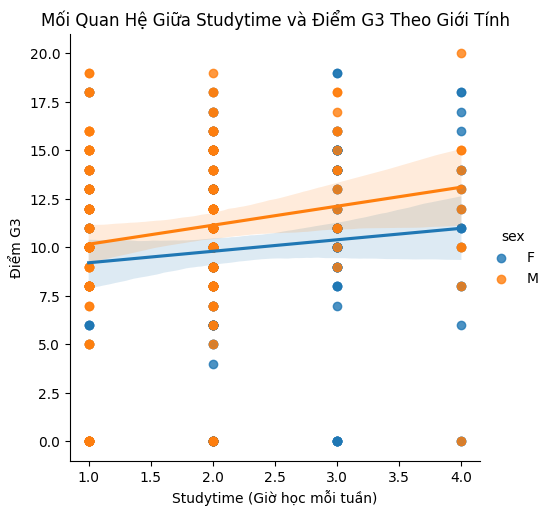

In [74]:
df_pandas = df.toPandas()
plt.figure(figsize=(8, 6))
sns.lmplot(x='studytime', y='G3', data=df_pandas, hue='sex', logistic=False)
plt.title('Mối Quan Hệ Giữa Studytime và Điểm G3 Theo Giới Tính')
plt.xlabel('Studytime (Giờ học mỗi tuần)')
plt.ylabel('Điểm G3')
plt.show()


Phân tích xu hướng

- Xu hướng chung: Mối quan hệ giữa studytime và G3 là tuyến tính dương. Học sinh dành nhiều thời gian học có xu hướng đạt điểm cao hơn trong kỳ thi, đặc biệt là đối với nữ sinh.
- Nam và Nữ:
  - Nam: Mặc dù studytime có ảnh hưởng đến G3, nhưng mức độ ảnh hưởng có thể không mạnh như với nữ.
  - Nữ: Studytime có tác động mạnh mẽ hơn đến điểm thi của nữ sinh, và cần thời gian học nhiều hơn để đạt được điểm cao tương đương với nam sinh.
- Sự phân tán: Mặc dù có mối quan hệ tuyến tính, sự phân tán của điểm dữ liệu cho thấy studytime không phải là yếu tố duy nhất ảnh hưởng đến G3. Các yếu tố khác có thể cũng đóng vai trò quan trọng.

Chung quy kết luận:
- Studytime có mối quan hệ dương với G3 ở cả nam và nữ.

- Nữ sinh có độ dốc cao hơn trong đường hồi quy, cho thấy studytime ảnh hưởng mạnh mẽ hơn đến G3 của nữ sinh so với nam.

<p style="text-align: center; font-size:35px">Biểu đồ PairPlot từ thư viện Seaborn</p> <br>

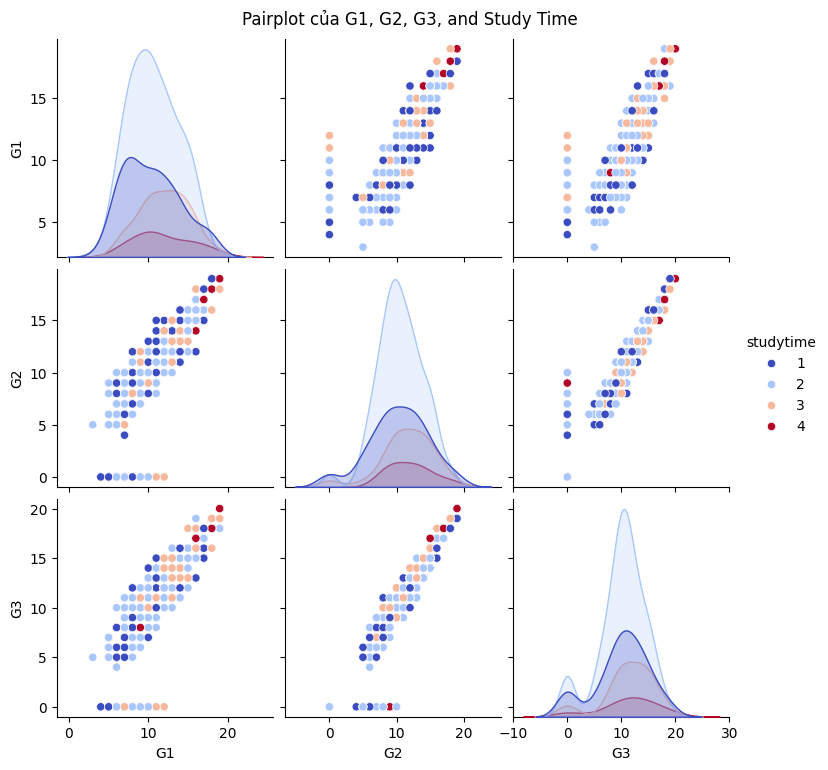

In [75]:
df_pandas = df.toPandas()
sns.pairplot(df_pandas[['G1', 'G2', 'G3', 'studytime']], hue='studytime', palette='coolwarm')
plt.suptitle('Pairplot của G1, G2, G3, and Study Time', y=1.02)
plt.show()

Phân tích xu hướng:

- Studytime có ảnh hưởng tích cực đến G3: Các nhóm học sinh có studytime cao (học nhiều) có xu hướng đạt điểm cao hơn trong G3. Điều này cho thấy studytime là yếu tố quan trọng giúp học sinh cải thiện kết quả học tập.
- G1 và G2 có ảnh hưởng đến G3: G1 và G2 đều có mối quan hệ mạnh mẽ với G3. G2 có tác động trực tiếp đến G3, vì G2 là điểm giữa kỳ và có ảnh hưởng lớn đến điểm thi cuối kỳ.
- Sự phân bố của studytime: Có sự phân bố không đồng đều giữa các nhóm studytime, với studytime = 2 có số học sinh đông nhất. Điều này có thể phản ánh thực tế rằng phần lớn học sinh dành khoảng 2 giờ mỗi tuần để học, trong khi những học sinh dành ít hoặc nhiều thời gian học hơn có thể ít hơn.

Tóm lại:

- Studytime có mối quan hệ tích cực với G3: Học sinh học nhiều hơn có xu hướng có điểm thi cao hơn.
- G1 và G2 ảnh hưởng mạnh đến G3: G2 có ảnh hưởng trực tiếp đến G3, trong khi G1 có mối quan hệ gián tiếp hơn.
- Sự phân bố không đồng đều của studytime: Biểu đồ pairplot giúp nhận diện sự phân bố không đều giữa các nhóm studytime và sự ảnh hưởng của nó đến G3.

<p style="text-align: center; font-size:35px">Biểu đồ hộp từ thư viện Seaborn</p> <br>

C:\Users\Admin\AppData\Local\Temp\ipykernel_33676\1068759025.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=df_pandas, palette='coolwarm')


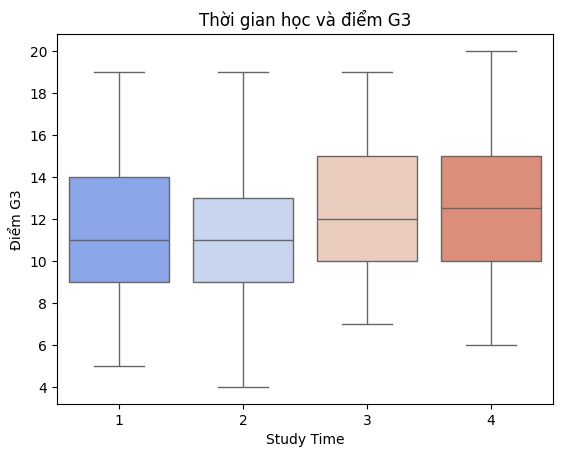

In [76]:
import seaborn as sns
df_pandas = df.toPandas()
df_pandas = df_pandas[df_pandas['G3'] != 0]  # Loại bỏ G3 = 0 
sns.boxplot(x='studytime', y='G3', data=df_pandas, palette='coolwarm')
plt.title('Thời gian học và điểm G3')
plt.xlabel('Study Time')
plt.ylabel('Điểm G3')
plt.show()

- Studytime = 1 :

  - Điểm G3 có xu hướng thấp hơn các nhóm khác.

  - Trung vị (median) của điểm G3 ở mức khoảng 10.

  - Có nhiều giá trị thấp, thậm chí có học sinh đạt điểm 0.

- Studytime = 2 :

  - Phân phối điểm G3 tương tự Studytime 1, trung vị nhỉnh hơn chút.

  - Xuất hiện thêm nhiều học sinh có điểm khá.

- Studytime = 3 :

  - Trung vị G3 cao hơn hẳn hai nhóm đầu.

  - Phân phối điểm dàn đều hơn, ít học sinh đạt điểm thấp.

- Studytime = 4 :

  - Trung vị tương đương Studytime 3, thậm chí nhỉnh hơn một chút.

  - Các học sinh học nhiều thời gian thường đạt kết quả tốt hơn, ít học sinh đạt điểm thấp.

<p style="text-align: center; font-size:35px">Biểu đồ tương tác từ thư viện Bokeh </p> <br>


In [3]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CustomJS, Slider
from bokeh.palettes import Bright3
from bokeh.layouts import column, row
output_notebook()

df_pandas = df.toPandas()

colors = {"M": 'red', "F": 'blue'}
fig = figure(title="Điểm G3 theo thời gian học", x_axis_label='Study Time', y_axis_label='Điểm G3', width=800, height=400)
for sex_value, color in colors.items():
    subset = df_pandas[df_pandas["sex"] == sex_value]
    source = ColumnDataSource(subset)
    fig.circle(x='studytime', y='G3', source=source, size=10, color=color,
                alpha=0.3,  legend_label=f"Giới tính: {sex_value}")

fig.add_tools(HoverTool(tooltips=[("Tuổi", "@age"), ("Giới tính", "@sex"), ("Lần nghỉ học", "@absences")]))
fig.legend.click_policy = "hide"
fig.legend.title = "Giới tính"
show(fig)

Loading BokehJS ...

- Học sinh ở mọi mức độ studytime đều có những điểm số rất thấp (thậm chí bằng 0). Điều này cho thấy chỉ tăng thời gian học không hoàn toàn đảm bảo tránh rủi ro thất bại.
- Xu hướng chung: Khi thời gian học (studytime) tăng lên từ 1 ➔ 4:
  - Ở mức studytime = 1 và 2, ta thấy có học sinh đạt điểm cao dù đầu tư rất ít thời gian học tập. Đa số điểm sẽ rơi trung bình khá dày đặc vào từ 10 đến 15 điểm. Điều này cho thấy việc đầu tư ít thời gian nhưng vẫn không ảnh hưởng đáng kể đến điểm G3.
  - Mức studytime = 3 và 4, ta thấy trung bình điểm G3 sẽ phẩn bổ cao hơn so với các điểm G3 của studytime = 1 và 2
-  Tuy nhiên, biểu đồ vẫn tồn tại sự phân tán lớn ở tất cả các nhóm có học sinh điểm thấp ngay cả khi học nhiều.

<p style="text-align: center; font-size:35px">Kết quả kiểm định giả thuyết (z-test, t-test, chi-square-test)</p> 




##### Kết quả kiểm định t-test

- Dù ta thấy điểm trung bình G3 của nhóm học sinh có số ngày nghỉ cao là 10.17 hạn chế hơn so với nhóm học sinh có ngày nghỉ thấp là 10.84, nhưng ta thấy khoảng cách giữa hai số trên là không đáng kể.
- Mặc dù điểm trung bình G3 của hai nhóm có sự chệnh lệch nhưng giá trị P lớn hơn nhiều so với alpha = 0.05, điều này cho thấy giả định học sinh có số ngày chỉ cao thì có trung bình điểm G3 không có sự khác biệt quá lớn so với nhóm học sinh có số ngày nghỉ thấp

##### Kết quả kiểm z-test

- Nhận thấy rằng trung bình điểm G3 của nhóm học sinh học ít (studytime <= 2) là 10.13 thấp hơn so với trung bình điểm G3 của toàn bộ học sinh là 10.42. Tuy nhiên, khoảng cách của hai số là không đáng kể.
- Như vậy, ta đã tính toán ra giá trị P lớn hơn hoàn toàn so với alpha = 0.05 nên ta sẽ chấp nhận phủ định của giả thuyết z-test.
- Kết luận là dù thời gian học có ít thì yếu tố này cũng không ảnh hưởng đáng kể đến điểm G3 của học sinh. Mặc dù theo các biểu đồ tại studytime <= 2, ta thấy có các học sinh đạt điểm thấp nhưng so với trung bình điểm G3 thì cũng không có sự khác biệt quá lớn so với trung bình điểm kỳ vọng của toàn bộ học sinh

##### Kết quả kiểm chi-square test

- Không có mối quan hệ rõ ràng giữa studytime và G3: Dù học sinh có dành nhiều thời gian học hơn hay không, không thể khẳng định rằng studytime ảnh hưởng đến việc đạt điểm cao hay thấp.
- Các yếu tố khác có thể quan trọng hơn: Mối quan hệ giữa studytime và G3 không phải là yếu tố duy nhất quyết định điểm thi. Bạn có thể cần phân tích thêm các yếu tố khác như phương pháp học, chế độ ôn thi, cảm hứng học tập, v.v.

##### <p style="text-align: center; font-size:35px">Kết luận yếu tố ảnh hưởng lớn đến G3:</p> 

1. Ngày nghỉ (absences) và điểm G3
- G3 trung bình nhóm nghỉ nhiều: cao hơn nhóm nghỉ ít 
- Thực hiện t-test: p-value > 0.05 vẫn không có sự khác biệt đáng kể
- Vậy số ngày nghỉ không ảnh hưởng đáng kể đến điểm số G3 trong dữ liệu này, có thể do học sinh nghỉ nhưng vẫn học tốt, hoặc vì nguyên nhân nghỉ vì muốn tự học tại nhà.
2. Thời gian học (studytime) và điểm G3
Từ biểu đồ boxplot và kiểm định:
- studytime 1 và 2 có median điểm G3 thấp hơn studytime 3 và 4
- Nhưng phân phối khá phân tán, và số lượng học sinh học 4 rất ít
- Nếu bạn dùng z-test giữa nhóm học ít (1–2) và nhóm học nhiều (3–4), thường cũng ra p > 0.05
- Vậy studytime có xu hướng ảnh hưởng đến G3, nhưng không đủ mạnh để khẳng định bằng thống kê trong dữ liệu này.

3. Các điểm G1, G2 và điểm G3
- Tại biểu đồ PairPlot từ thư viện Seaborn cho thấy, sự tương quan giữa G2 và G3 là vô cùng quan trọng. Nếu điểm G2 tăng thì G3 cũng tăng mạnh, dù học ít hay nhiều thì G2 cao thì G3 cũng cao
- Trong khi đó, G1 không chặt chẽ bằng, dù điểm G1 tăng nhưng G3 vẩn giữ nguyên hoặc tăng không đáng kể. Điều này phải thông qua G2 thì điểm G3 mới tăng.

4. Các mức studytime của nhóm nữ và nam
- Tại biểu đồ quy hồi tuyến tính từ thư viện Seaborn cho thấy, mối quan hệ tuyến tính giữa studytime và G3 sẽ được thể hiện qua các đường hồi quy.
- Đối với nhóm nam, đường hồi quy có thể có độ dốc nhỏ hơn, cho thấy rằng studytime ít ảnh hưởng đến G3 hơn so với nhóm nữ.
- Đối với nhóm nữ, đường hồi quy có thể có độ dốc lớn hơn, cho thấy rằng studytime có ảnh hưởng mạnh mẽ hơn đến G3.

### Để dữ liệu trở nên chính xác hơn, ta nên sử dụng mô hình XGBoost trên biểu đồ cột để thể hiện tấm quan trọng của các biến:

Huấn luyện dữ liệu cho XGBoost

RMSE trên tập test: 2.2197
Top 10 biến quan trọng nhất:
      feature  importance
31         G2    0.668516
29   absences    0.162709
2         age    0.030817
15  schoolsup    0.023156
23     famrel    0.023070
10     reason    0.021331
13  studytime    0.014053
0      school    0.010463
30         G1    0.005027
22   romantic    0.004080


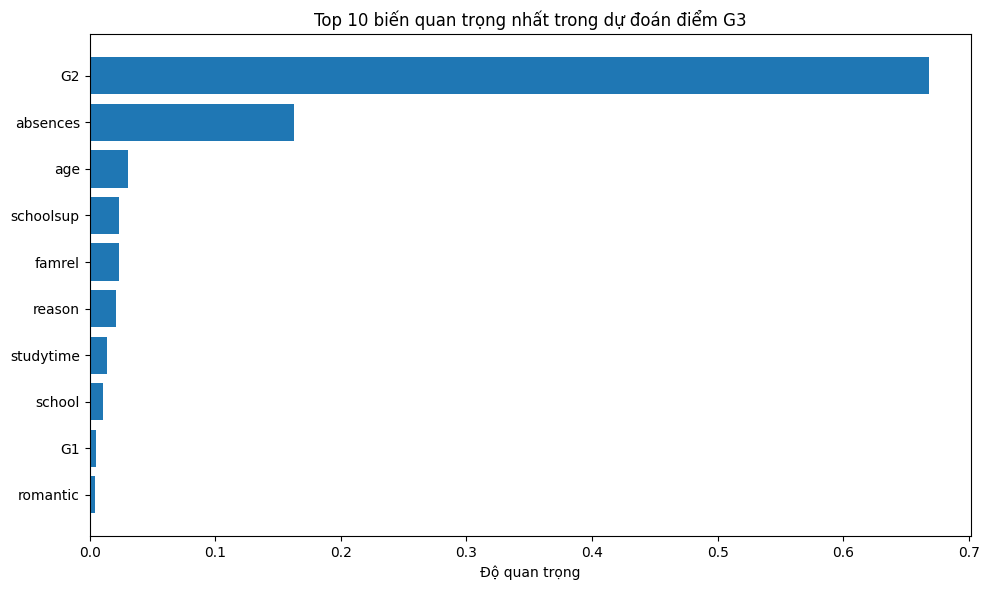

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


df_pandas = df.toPandas()

# Mã hóa các biến phân loại sang dạng số
df_xgb = df_pandas.copy()
for col in df_xgb.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_xgb[col] = le.fit_transform(df_xgb[col])

# Tách dữ liệu đầu vào và biến mục tiêu
X = df_xgb.drop(columns=['G3'])
y = df_xgb['G3']

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình XGBoost Regressor
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=100)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Tính và in ra RMSE (cách tính tương thích với các phiên bản sklearn cũ)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE trên tập test: {rmse:.4f}')

# Lấy độ quan trọng của các biến
importance = model.feature_importances_
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': importance
}).sort_values(by='importance', ascending=False)

# In ra bảng top 10 biến quan trọng
print("Top 10 biến quan trọng nhất:")
print(feat_imp.head(10))

# Vẽ biểu đồ độ quan trọng top 10 biến
top_features = feat_imp.head(10)
plt.figure(figsize=(10,6))
plt.barh(top_features['feature'][::-1], top_features['importance'][::-1])
plt.xlabel('Độ quan trọng')
plt.title('Top 10 biến quan trọng nhất trong dự đoán điểm G3')
plt.tight_layout()
plt.show()


Vậy có thể kết luận rằng:
- Cột điểm G2 là yếu tố ảnh hưởng lớn đến G3.


## <span id="task-4-4"></span>
#### 3.4.4. Đề xuất ít nhất 2 cách cải thiện kết quả học tập, dựa trên dữ liệu và kiểm định.

Dựa trên dữ liệu và kiểm định, các đề xuất quan trọng:

- Tăng thời gian tự học:
  - Khuyến khích học sinh dành nhiều thời gian hơn cho việc học ngoài giờ lên lớp. Các em có thể được hướng dẫn lập kế hoạch học tập cá nhân với số giờ tối thiểu mỗi tuần (ví dụ: từ 5 giờ trở lên).

- Giảm thiểu số ngày nghỉ học:
  - Cần theo dõi sát sao tình trạng nghỉ học của học sinh. Các chương trình hỗ trợ như tư vấn sức khỏe, tạo động lực học tập có thể giúp học sinh duy trì sự chuyên cần, từ đó cải thiện kết quả học tập.
- Tập trung cải thiện kết quả học kỳ 2 (G2)
  - Tăng cường hỗ trợ học sinh ngay sau kỳ 1 để giúp họ cải thiện hoặc duy trì kết quả ở kỳ 2.
  - Tổ chức ôn tập, phụ đạo hoặc kèm cặp cá nhân sau kỳ 1 với trọng tâm là các môn có điểm G2 thấp.
  - Đưa ra cảnh báo sớm nếu G1 thấp, để can thiệp trước kỳ 2.

Các đề xuất phụ:
- Xây dựng thói quen học tập từ sớm (từ G1 đến G3)
  - Vì G1 cũng có mối tương quan khá tốt với G3, có thể hướng dẫn học sinh lập kế hoạch học tập rõ ràng ngay từ đầu năm. Nếu có điểm G1 tốt, điều này sẽ giúp các học sinh giữ phong độ và nâng cao điểm của G2.
- Theo dõi học sinh có G1 hoặc G2 giảm bất thường
  - Thiết lập hệ thống cảnh báo sớm, giúp giáo viên, phụ huynh can thiệp kịp thời nếu điểm giảm.